In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import warnings
import time

warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('train.csv')

df_train.shape

(1460, 81)

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

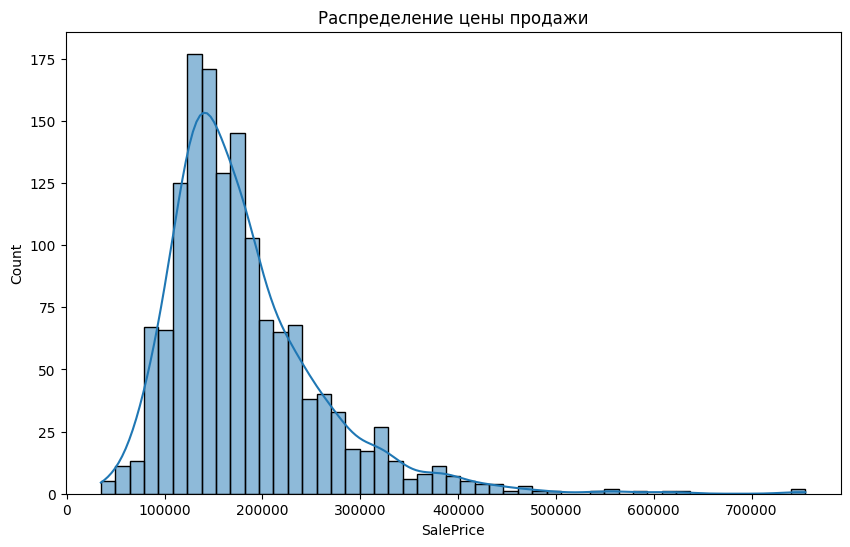

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train['SalePrice'], kde=True)
plt.title('Распределение цены продажи')
plt.show()

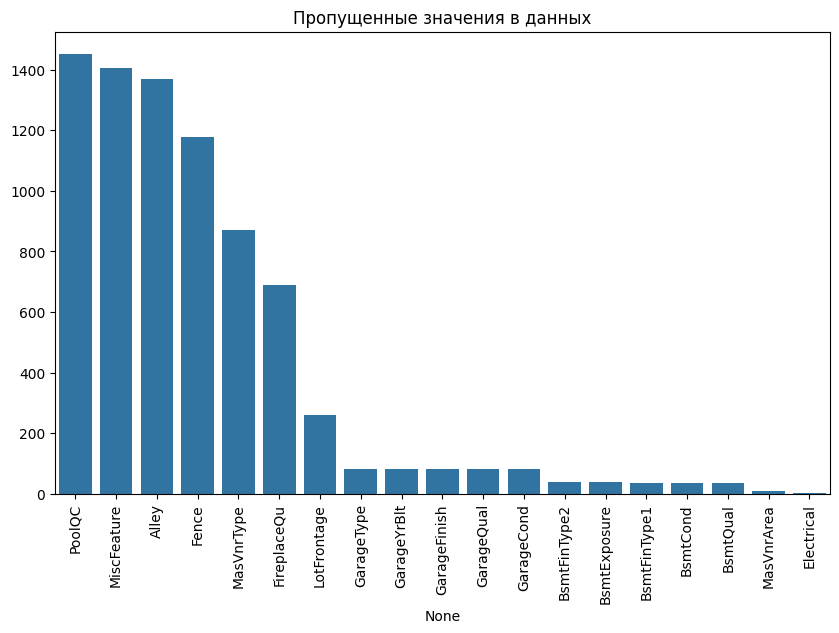

In [7]:
missing_values = df_train.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True, ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=90)
plt.title('Пропущенные значения в данных')
plt.show()

In [10]:
for column in df_train.columns:
    if df_train[column].dtype == "object":
        df_train[column].fillna("None", inplace=True)
    else:
        df_train[column].fillna(df_train[column].mean(), inplace=True)

print(df_train.isnull().sum().sum())
df_train.head()


0


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


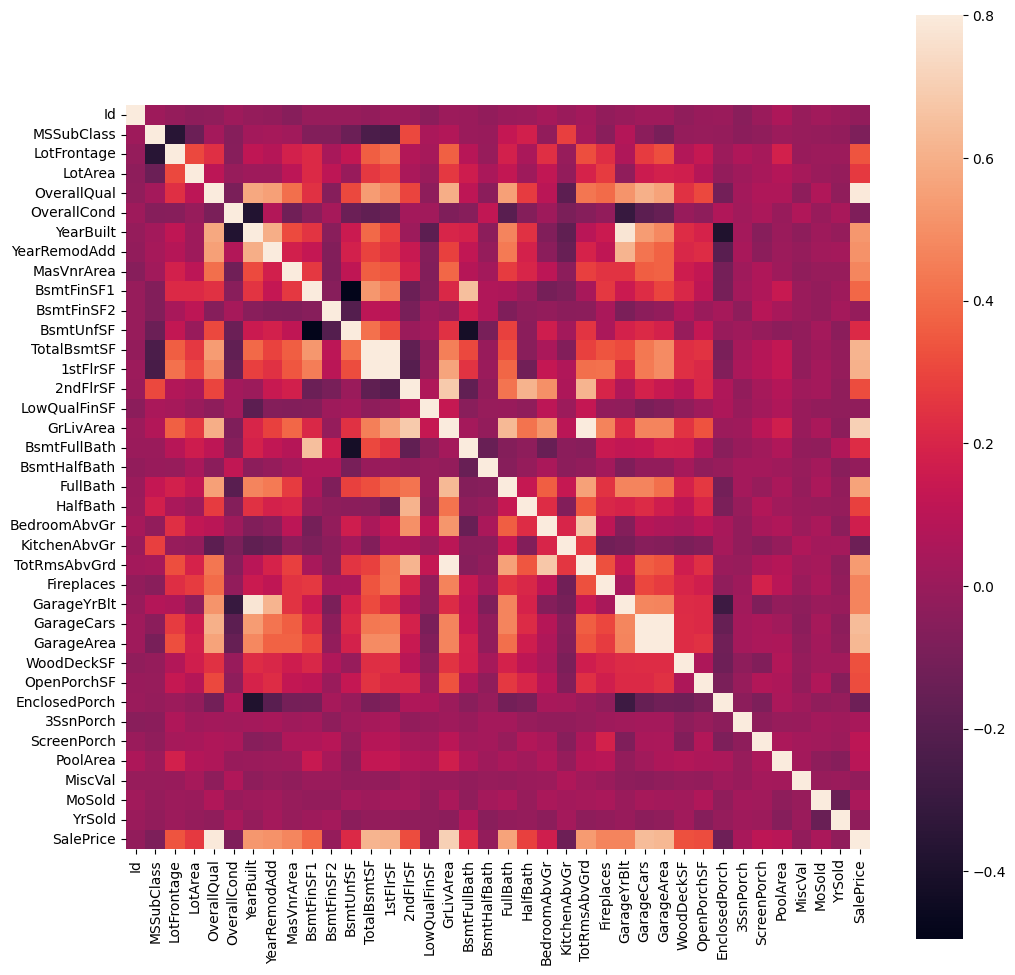

In [11]:
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df_train.select_dtypes(include=['number']).corr(), vmax=0.8, square=True)
plt.show()



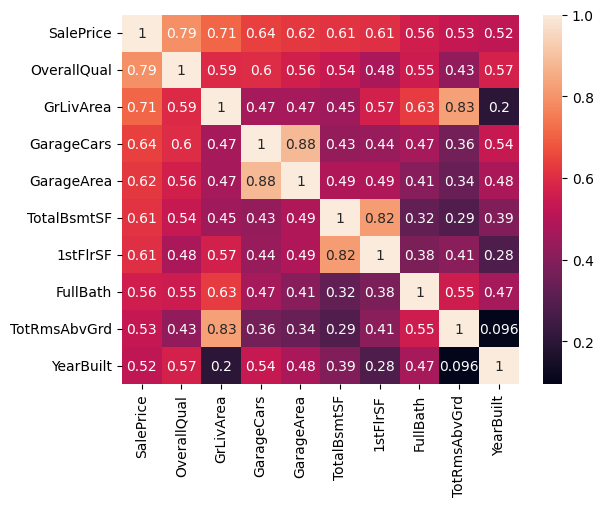

In [12]:
k = 10
cols = df_train.select_dtypes(include=['number']).corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.heatmap(cm, cbar=True, annot=True, xticklabels=cols.values, yticklabels=cols.values)
plt.show()

In [13]:
y_train = np.log1p(df_train.pop('SalePrice'))
X_train = df_train
X_train = pd.get_dummies(X_train)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [14]:
start_time = time.time()
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Regressor': SVR()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    mse = mean_squared_error(y_valid, y_pred)
    r2 = r2_score(y_valid, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}

results_df = pd.DataFrame(results).T
print(results_df)
print(f'Обучение и оценка модели заняли {time.time() - start_time:.2f} секунд')

                               MSE        R2
Linear Regression         0.017460  0.906434
Ridge                     0.017138  0.908162
Lasso                     0.036997  0.801744
Random Forest             0.022194  0.881067
Gradient Boosting         0.017795  0.904639
Support Vector Regressor  0.045814  0.754494
Обучение и оценка модели заняли 4.64 секунд


In [15]:
start_time = time.time()
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)

ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

ridge_pred = ridge.predict(X_valid)
lasso_pred = lasso.predict(X_valid)

ridge_mse = mean_squared_error(y_valid, ridge_pred)
lasso_mse = mean_squared_error(y_valid, lasso_pred)

ridge_r2 = r2_score(y_valid, ridge_pred)
lasso_r2 = r2_score(y_valid, lasso_pred)

print(f'Ridge MSE: {ridge_mse}, R2: {ridge_r2}')
print(f'Lasso MSE: {lasso_mse}, R2: {lasso_r2}')
print(f'Обучение и оценка модели заняли {time.time() - start_time:.2f} секунд')

Ridge MSE: 0.01713801415929442, R2: 0.9081618167886295
Lasso MSE: 0.032699586955626206, R2: 0.8247713749181207
Обучение и оценка модели заняли 0.22 секунд


In [16]:
start_time = time.time()
param_grid = {
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_features': ['auto', 'sqrt', 'log2']
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1, 0.2]
    }
}

best_models = {}
for name in ['Random Forest', 'Gradient Boosting']:
    grid_search = GridSearchCV(models[name], param_grid[name], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f'Best parameters for {name}: {grid_search.best_params_}')

print(f'Обучение и оценка модели заняли {time.time() - start_time:.2f} секунд')


Best parameters for Random Forest: {'max_features': 'auto', 'n_estimators': 100}
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'n_estimators': 200}
Обучение и оценка модели заняли 103.74 секунд


In [17]:
start_time = time.time()
models = {
    'Random Forest': RandomForestRegressor(max_features = 'auto', n_estimators = 200),
    'Gradient Boosting': GradientBoostingRegressor(learning_rate = 0.1, n_estimators = 200)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    mse = mean_squared_error(y_valid, y_pred)
    r2 = r2_score(y_valid, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}

results_df = pd.DataFrame(results).T
print(results_df)
print(f'Обучение и оценка модели заняли {time.time() - start_time:.2f} секунд')

                        MSE        R2
Random Forest      0.022090  0.881627
Gradient Boosting  0.017389  0.906818
Обучение и оценка модели заняли 8.54 секунд


In [18]:
start_time = time.time()
# Обучение моделей
ridge = Ridge()
random_forest = RandomForestRegressor(max_features='auto', n_estimators=200)
ensemble = VotingRegressor(estimators=[('ridge', ridge), ('random_forest', random_forest)])

# Обучение ансамблевой модели
ensemble.fit(X_train, y_train)

# Предсказание на валидационной выборке
y_pred = ensemble.predict(X_valid)

# Оценка модели
mse = mean_squared_error(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)
print(f'MSE: {mse}, R2: {r2}')
print(f'Обучение и оценка модели заняли {time.time() - start_time:.2f} секунд')

MSE: 0.016880752419780026, R2: 0.9095404158811029
Обучение и оценка модели заняли 7.37 секунд


In [19]:
# Вывод результатов
results_df = pd.DataFrame({'Real Values': np.expm1(y_valid), 'Predicted Values': np.expm1(y_pred)})
print(results_df.head())

      Real Values  Predicted Values
892      154500.0     146015.481473
1105     325000.0     323317.229434
413      115000.0     109038.093257
522      159000.0     159802.452744
1036     315500.0     319765.300896


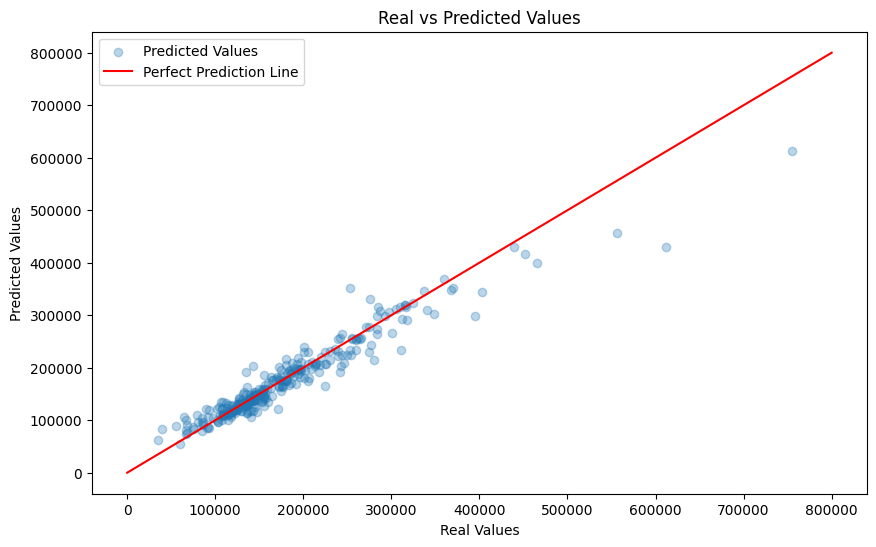

In [20]:
# Визуализация реальных и предсказанных значений
plt.figure(figsize=(10, 6))
plt.scatter(np.expm1(y_valid), np.expm1(y_pred), alpha=0.3, label='Predicted Values')
plt.plot([0, 800000], [0, 800000], 'r', label='Perfect Prediction Line')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Real vs Predicted Values')
plt.legend()
plt.show()